# images and heatmaps

In [12]:
import matplotlib.pyplot as plt
import numpy as np

We are going to use a digital elevation model (DEM) from the [basemap tutorial](https://github.com/rveciana/BasemapTutorial/blob/master/code_examples/sample_files/dem.tiff) as the sample data set in this section (which is bunlded in the repository as an npy file) for the zone of Montserrat at 5m resolution.

In [13]:
im = np.load('dem.npy')

In [14]:
print(f"type: {type(im)}, shape: {im.shape}, dtype: {im.dtype}")

type: <class 'numpy.ndarray'>, shape: (324, 368), dtype: float32


To display 2D images the data needs to be spatially re-sampled to fit the screen and mapped from scaler values in the array to the colors we see on the screen.

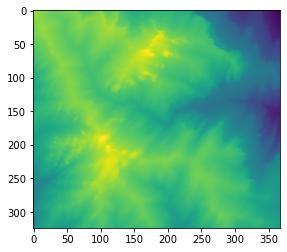

In [15]:
plt.imshow(im)

of course we should include a color bar to go with the image:

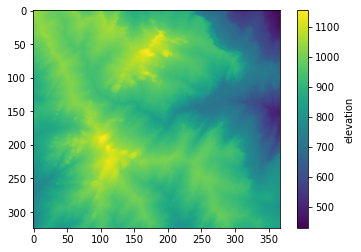

In [16]:
fig, ax = plt.subplots()
img = ax.imshow(im)
cbar = fig.colorbar(img)
cbar.set_label('elevation')

By default the colors are scaled over the full range of the input data, however this may not always be what you want (for example, if you are interested on a small contrast on top of a background or if there are extreme outliers).  To set the lower limit, use the `vmin` parameter to `imshow`  

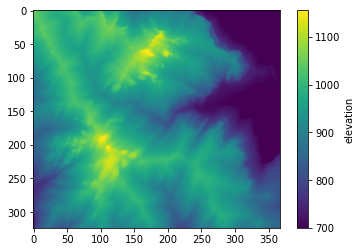

In [17]:
fig, ax = plt.subplots()
img = ax.imshow(im, vmin=700)
cbar = fig.colorbar(img)
cbar.set_label('elevation')

Note how the upper left which used to have texture is now colored unifromly and the lower limit of the color bar has been changed.

### Exercise

Use the `vmax` parameter to restrict color space from above.

## All the colors

While the default color map, [which replace 'jet' in mpl 2.0](https://bids.github.io/colormap/) has many good properties, but sometimes you just are not feeling the green (or have a [domain specfic reason for needing a different color map](https://matplotlib.org/cmocean)).  The color map can be controlled via the `cmap` parameter to `imshow`

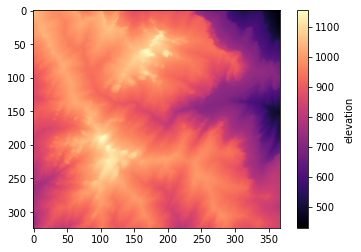

In [18]:
fig, ax = plt.subplots()
img = ax.imshow(im, cmap='magma')
cbar = fig.colorbar(img)
cbar.set_label('elevation')

### Exercise

Have a look at the [color maps available](https://matplotlib.org/tutorials/colors/colormaps.html) and try out some different colors.

## Follow the lines

A different way to visualize array data is via a contour plot.

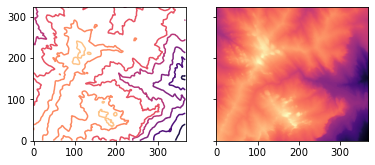

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.contour(im, cmap='magma')
ax1.set_aspect('equal')
ax2.imshow(im, cmap='magma', origin='lower')      # put (0, 0) on the lower left to match contour

### Exercise

Try changing the `cmap` and `levels` parameters to `contour`

# Interactive figures

In addition to the static figures we have been working with, Matplotlib can produce interactive figures.  For use on a desktop there are bindings to produces figures using the Tk, Gtk, Wx, and Qt frameworks.   These can be used as stand-alone windows are embedded in large applications, see [the gallery](https://matplotlib.org/gallery/#embedding-matplotlib-in-graphical-user-interfaces) for details.

There are two backends to work with IPython/Jupyter notebook:

 - NBAgg which ships with Matplotlib  
   - `%matplotlib notebook`
 - ipympl which is an additional package 
   - `%matplotlib widgets`
 
 


NBAgg only works in the classic IPython notebook but not in Jupyter lab (because the way it works is by injecting a fair amount of javascript into the DOM which is a security hole).  ipympl is built on top of the `ipywidgets` framework and requires a jupyterlab extension to be installed in addition to the python module.
 
If you are in the classic notebook
 
 ```python
%matplotlib notebook
```

will enable NBAgg.  In either the classic notebook or jupyter lab

```python
%matplotlib widget
```

will enable ipympl.

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


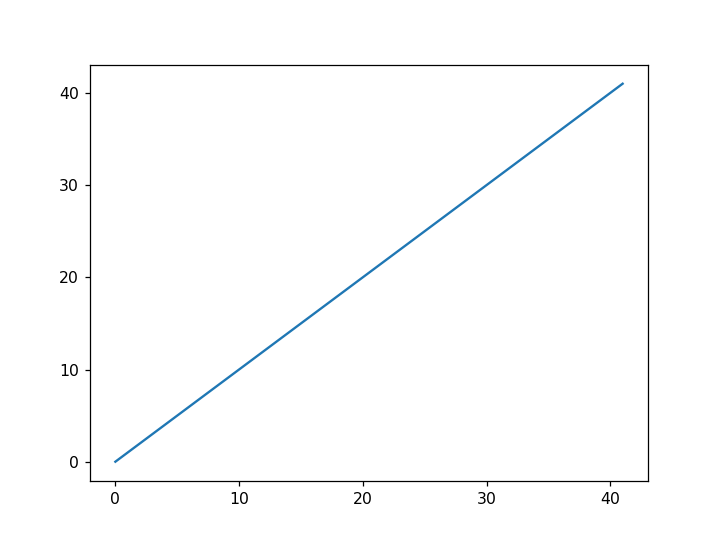

In [23]:
fig, ax = plt.subplots()
ax.plot(range(42))

You should now have an interactive figure that you can pan / zoom around on just like on the desktop.  Matplotlib is using a client-server model for the display, user input is sent from the Jupyter front-end back to Matplotlib running in your kernel and the kernel ships the rendered png to the browser.  This has he advantages that the plots will look identical to using `inline` or the desktop backends and we do not need to ship all of your data to the browser.  However, this approach has will have higher latency than an in-browser plotting library (such as bokeh or plotly).

## print statements and tracebacks in callbacks

Any print statements or tracebacks in user-callbacks will not be naively shown in the notebook (because it is not clear _where_ they should be shown; in a terminal they are printed to stdout of which there is only one, in a notebook there are many output cells, any of which may be the correct place to print).  For convince in the next few notebooks we have provided a helper to make sure that the print statements will be associated with an output area under the `Figure`.

In [24]:
%run ensure_print.py

Understanding this code is not required for this tutorial, but running the above is required for the following notebooks to run properly.  We are discussing how to solve this in a cleaner way [at ipympl](https://github.com/matplotlib/jupyter-matplotlib/issues/116).

To test that this is working, run the following cell and pan/zoom around.

<IPython.core.display.Javascript object>


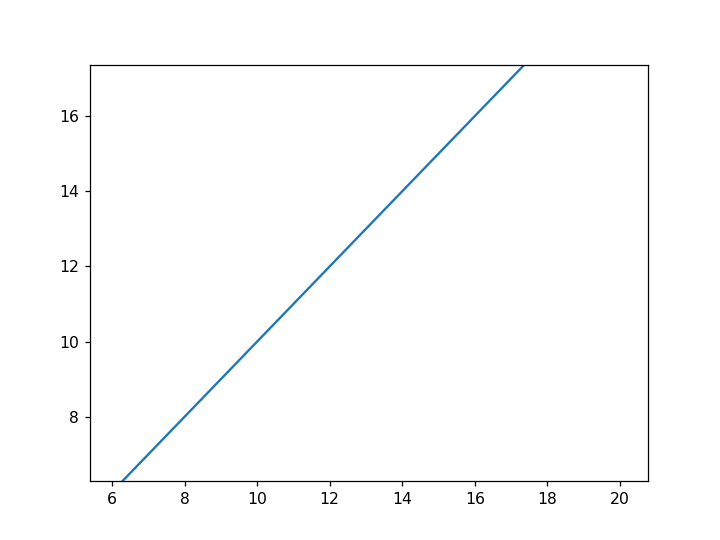

Output()

In [31]:
fig, ax = plt.subplots()
ax.plot(range(52))


<IPython.core.display.Javascript object>


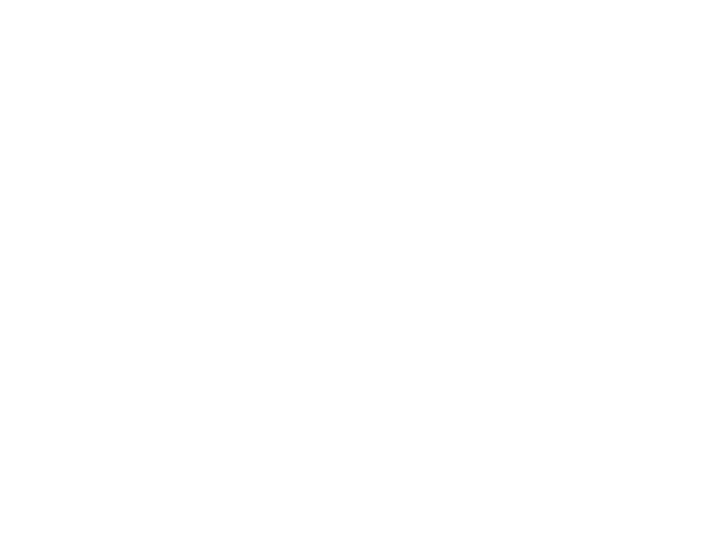

Output()

In [26]:
#%matplotlib notebook
%matplotlib widget
%run ensure_print.py

In [27]:
import matplotlib.pyplot as plt
import matplotlib.widgets as mwidgets
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd

In [29]:
mpg = pd.read_csv('auto-mpg.data', delim_whitespace=True)

<IPython.core.display.Javascript object>


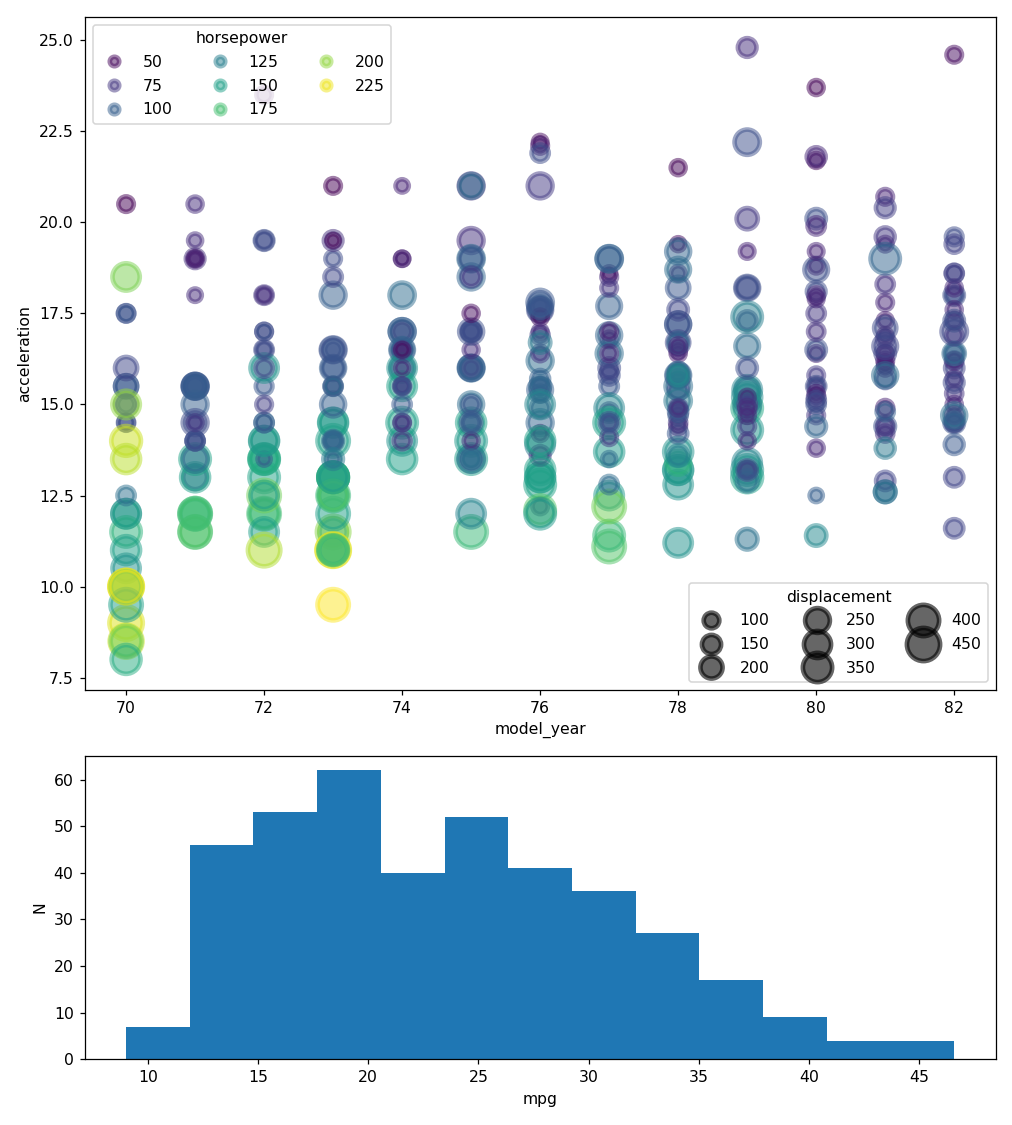

Output()

In [30]:
def make_slider(fig, data, 
                x_data='model_year',
                y_data='acceleration',
                c_data='horsepower' ,
                s_data='displacement'):
    h_data = 'mpg'
    # use gridspec to build un-evenly split axes, make what will be the 
    # histogram axes 1/3 the height of the main axes.
    gs = GridSpec(3, 1, figure=fig)
    ax1 = fig.add_subplot(gs[0:2, :])
    ax2 = fig.add_subplot(gs[2, :])
    
    # histogram the the mgp
    hist = ax2.hist(h_data, data=data, bins='auto') 
    ax2.set(xlabel=h_data, ylabel='N')
    # set up a text label to publish updates to
    range_label = ax2.annotate('', (1, 1), 
                               ha='right', va='top', 
                               xycoords='axes fraction', 
                               xytext=(-4, -4), 
                               textcoords='offset points') 
 
    # plot the data with some alpha and extra think marker edges
    sc = ax1.scatter(x_data, y_data, c=c_data, s=s_data, data=data, 
                     alpha=.5, linewidth=3) 
    ax1.set(xlabel=x_data, ylabel=y_data)
    
    # produce a legend with the unique colors from the scatter 
    legend1 = ax1.legend(*sc.legend_elements(), 
                    loc="upper left", title=c_data,  
                   ncol=3) 
    ax1.add_artist(legend1) 
     # produce a legend with a cross section of sizes from the scatter 
    handles, labels = sc.legend_elements(prop="sizes", alpha=0.6) 
    legend2 = ax1.legend(handles, labels, loc="lower right", title=s_data, ncol=3) 
    
   
    def mark_markers(low, high):
     
        base_ec = sc.get_facecolors() 
        ec = np.array(base_ec) 
        mask = (low < data[h_data]) & (data[h_data] < high) 
        mask = mask.values 
        ec[mask, :3] = [1, 0, 0] 
        sc.set_edgecolor(ec) 
        range_label.set_text(f'showing {low:.2f} < {h_data} < {high:.2f}')
        fig.canvas.draw_idle()
         
    slider = mwidgets.SpanSelector(ax2, mark_markers, 'horizontal', useblit=True, span_stays=True)
    fig.tight_layout()
    return slider 
 
s = make_slider(plt.figure(figsize=(9, 10)), mpg)